In [1]:
import numpy as np
import pickle
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cmaps

In [2]:
path = '/docker/mnt/d/research/D2/cnn3/predictant/main/pr_clim.npy'
data = np.load(path)
print(data.shape)

(42, 12, 120, 360)


In [3]:
#N5-25, E90-110
lat_lst = [7*5, 11*5]
lon_lst = [18*5, 22*5]
thailand = data[:,:,lat_lst[0]:lat_lst[1], lon_lst[0]:lon_lst[1]]
model_mean = thailand.mean(axis=0)
rainseason = model_mean[4:10,:,:]
total = rainseason.sum(axis=0)
mm = total*30

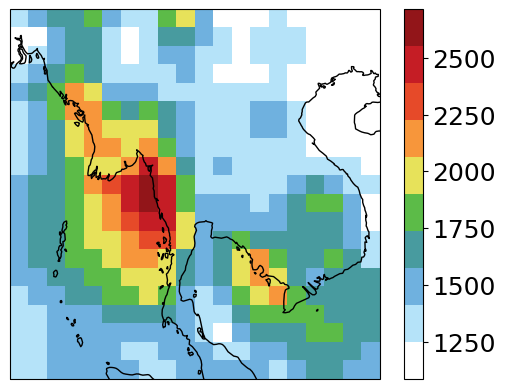

In [26]:
projection = ccrs.PlateCarree(central_longitude=180)
img_extent = (-90, -70, 5, 25)
#plt.register_cmap('WhiteBlueGreenYellowRed', cmaps.WhiteBlueGreenYellowRed)
cmap = plt.get_cmap('WhiteBlueGreenYellowRed', 10)

fig = plt.figure()
ax = plt.subplot(projection=projection)
ax.coastlines()
mat = ax.matshow(mm,
                 origin='upper',
                 extent=img_extent,
                 transform=projection,
                 cmap=cmap)
fig.colorbar(mat, ax=ax)
plt.rcParams["font.size"] = 18
plt.show()